---
---
## Question 1
What types can a pandas column be? Come up with at least three.

### answer
Pandas 有一个数据结构叫 DataFrame，就像一个 表格（类似 Excel）。
这个表格由 行（rows） 和 列（columns） 组成。
A pandas column 就是这个表格中的 某一列，例如 “Name” 列、“Age” 列、“Salary” 列。
每一列的数据可以有不同的类型，比如整数、浮点数、字符串、日期等。

Numeric types:
- int, int64, int32
- float, float64, float32
- complex numbers (less common)


Boolean type:
- bool

Stores True/False values.


String type (pandas extension type):
- string (capital-S “string dtype”)

Introduced to provide better handling of text data (nullable, consistent operations)

`df = df[df["Borough"].notna()]`
- 场景：处理缺失值（missing values）时，需要确认列的数据类型是否支持空值检查（NaN）。

`df["Borough"] = df["Borough"].str.strip()`
- 场景：对字符串列进行清洗（string cleaning / text processing）

`df.dtypes`
- 当你访问时df.dtypes，pandas 返回一个Series对象。
- 该 Series 的索引与原始 DataFrame 的列名相对应。
- 该序列的值是每一列的数据类型（dtypes）。
- 包含混合数据类型（例如，字符串和数字的混合）的列通常会被分配objectdtype。

- When you access df.dtypes, pandas returns a Series object.
- The index of this Series corresponds to the column names of your original DataFrame.
- The values of this Series are the data types (dtypes) of each respective column.

---
---
## Question 2
What are some scenarios where you’d need to deal with types in pandas? Come up with at least three.

### answer
Here are some clear and concise scenarios where you need to deal with types in pandas, each with a quick example:


### 1. Reading data and columns load with the wrong type

Sometimes pandas infers a column as *object* instead of *numeric*, affecting calculations.

**Example:**
`df['price'] = df['price'].astype(float)`
(fixing a column read as string `"12.5"`)

-

### 2. Performing numeric operations

Math requires numeric dtypes; strings or objects will cause errors.

**Example:**
`df['total'] = df['qty'] * df['unit_price']`

-

### 3. Handling missing values

Integer columns become float if NaN appears; using nullable types avoids this.

**Example:**
`df['age'] = df['age'].astype('Int64')`
(nullable integer)

.astype('Int64') 是一种 pandas 数据类型转换，用于将列的数据类型转换为支持缺失值 (NaN) 的整数类型。它与标准的 NumPy int 类型不同，后者不能表示缺失值。

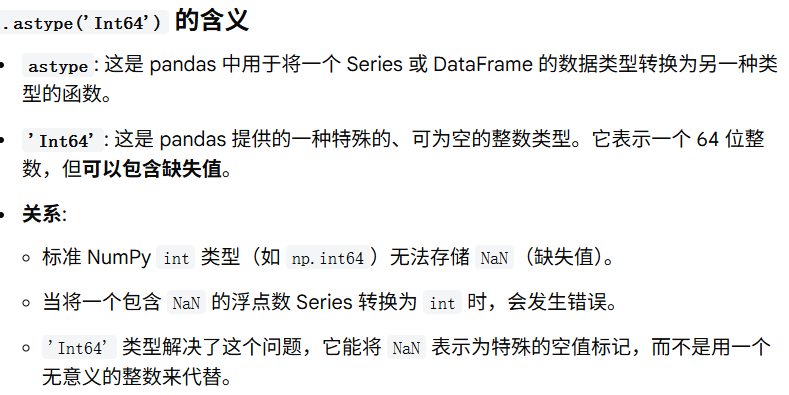

-

### 4. Working with dates or times

String dates must be converted to datetime to enable time-based operations.

**Example:**
`df['date'] = pd.to_datetime(df['date'])`

将 DataFrame 中表示日期的文本或数字数据转换为标准化的、计算机可识别和操作的日期时间格式

-

### 5. Using categorical data for memory efficiency or modeling

Categorical types speed up operations and reduce memory usage.

**Example:**
`df['country'] = df['country'].astype('category')`

将 DataFrame df 中名为 'country' 的列的数据类型从通用字符串/对象 (通常是 object) 转换为特殊的 category 类型
This reduces memory usage and makes operations like groupby, sorting, and comparisons faster.

-

### 6. Merging or joining tables

Keys must share the same dtype to avoid mismatches.

**Example:**
`df1['id'] = df1['id'].astype(int)`
`merged = df1.merge(df2, on='id')`

-

df["Borough"] = df["Borough"].str.strip()

df = df[df["Borough"].notna()]

---
---
## Question 3
~~How do you make a link in Markdown?~~ What is Markdown useful for? What are specific things you can do with it?

### Answer

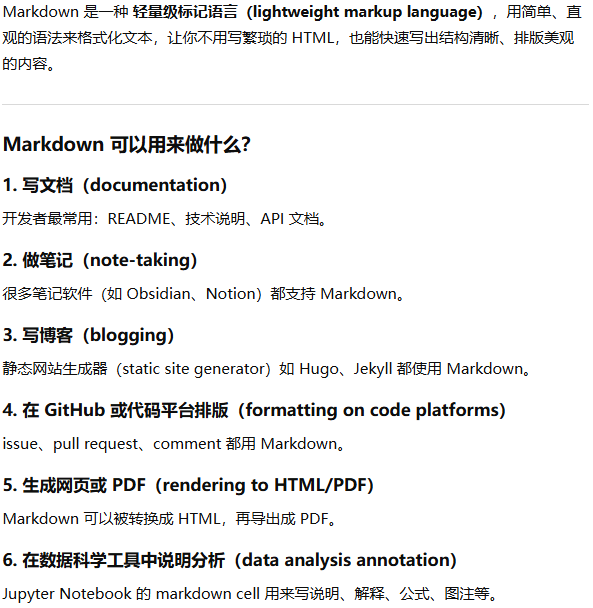

Markdown is a lightweight markup language标记语言 used to create formatted text格式化文本 using a simple, readable syntax语法. It is especially useful because it is easy to write, easy to read in plain text, and can be converted into HTML or other formats.

Markdown is useful for:

Writing documentation

Creating README files on GitHub

Taking notes in a structured way

Writing blog posts or technical articles

Formatting text in many platforms (GitHub, Jupyter Notebook, messaging apps, etc.)

Specific things you can do with Markdown:

Headings: #, ##, ###

Bold and italic text: `**bold**`**bold**, `*italic*`*italic*

Lists: - item (unordered), 1. item (ordered)

Links: `[text](https://example.com)`[text](https://example.com)

Images: `![alt text](image.png)`![alt text](image.png)

Code blocks:

Inline: `code`

Block:

```python  
print("hello")


Tables:
| col1 | col2 |

-

#### small question
How do you make a link in markdown?

Answer: Markdown syntax for a hyperlink is square brackets[] followed by parentheses(). The square brackets hold the text, the parentheses hold the link.

`[Link Text](URL)`
[Link Text](URL)

---
---
## Question 4
How does groupby() work?

groupby() in pandas works by splitting the DataFrame into groups based on the values of one or more columns, applying a function to each group, and then combining the results into a new DataFrame or Series. This process is often described as split–apply–combine.

Split: Divide rows into groups (e.g., by "category").

Apply: Perform an operation on each group, such as sum(), mean(), count(), or a custom function.

Combine: Merge the results back into a single object.

Example:

`df.groupby('department')['salary'].mean()`

This groups the rows by department and calculates the average salary for each group.

---
---
## Question 5
What is resampling used for? Include an example.

Python 里的重采样 (Resampling) 就是改变数据的时间“颗粒度”。你可以把数据打包得更粗略，或者拆分得更细致。

简单解释：
想象你有一堆记录了每天气温的数据。

降采样 (Downsampling)： 把每天的数据汇总成每月的平均气温。颗粒度变“粗”了。

升采样 (Upsampling)： 把每天的数据估算（插值）出每小时的气温。颗粒度变“细”了。

在 Python 中，这主要通过 pandas 库实现。

Resampling is used to change the frequency of time-series data—either by aggregating it to a lower frequency (downsampling) or expanding it to a higher frequency (upsampling). It helps summarize or restructure data by time intervals.

Example:
Aggregating daily sales into weekly totals:
`weekly = df.resample("W").sum()`

-

简单例子（使用 Pandas）：
假设我们有 3 天的每日销售数据。我们想把它按周汇总起来（降采样）。

In [5]:
import pandas as pd

# 1. 创建一个每日数据序列
dates = pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03'])
sales = pd.Series([10, 15, 20], index=dates)

print("原始每日数据:")
print(sales)

# 2. 使用 .resample('W') 进行重采样（W代表周）并求和
# 把这几天的销售额加起来，归类到这一周的结束日期
weekly_sales = sales.resample('W').sum()

print("\n重采样后的每周数据:")
print(weekly_sales)


原始每日数据:
2023-01-01    10
2023-01-02    15
2023-01-03    20
dtype: int64

重采样后的每周数据:
2023-01-01    10
2023-01-08    35
Freq: W-SUN, dtype: int64


-

### Example from lab 12
`weekly = df.resample("W", on="Date").sum().reset_index()`
It takes the DataFrame df, groups the rows into weekly periods based on the column "Date" (using "W" for weekly frequency), then sums all numeric columns within each week. Finally, it resets the index so the result becomes a regular DataFrame instead of having a DatetimeIndex.

`monthly = df.resample("M", on="Date").sum().reset_index()`

`yearly = df.resample("Y", on="Date").sum().reset_index()`

 .reset_index() 是 Pandas 库中用于重置数据框索引的函数。它将当前索引重置为默认的整数索引，并将原索引转换为 DataFrame 中的一列。

 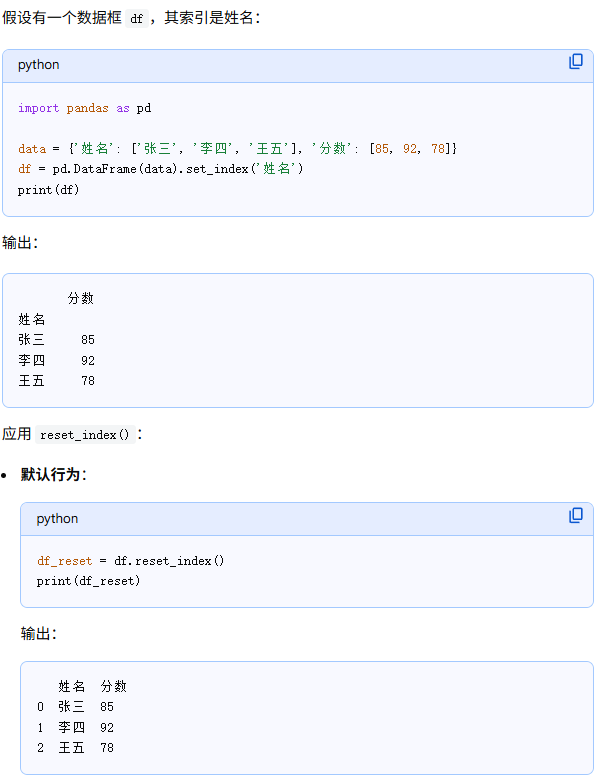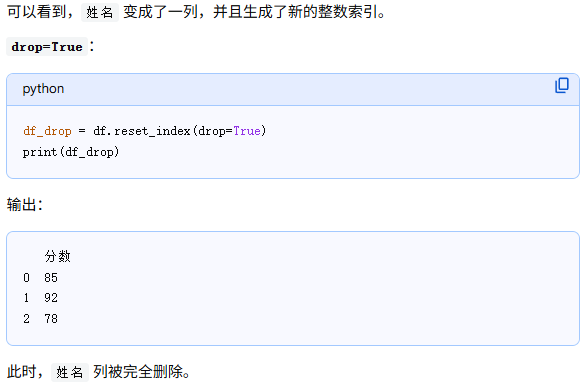

 .reset_index() is a pandas method that turns the current index into a regular column and then replaces the index with a new default integer index (0, 1, 2, …).

This is useful after operations like groupby() or resample() where the result often has a meaningful index, and you want it back as a normal column for further processing.

Example:

`df2 = df.groupby("Category").sum()`
"Category" becomes the index

`df2 = df2.reset_index()`
"Category" becomes a normal column again

---
---
## Question 6
What’s a kernel, in the context of this course?

### Answer
In the context of Python development within VS Code, especially when working with Jupyter Notebooks, a "kernel" refers to the **computational engine** responsible for executing the code in your notebook cells.

Execution Backend后端进程: It's the backend process后端进程 that runs the Python code you write in your Jupyter Notebook cells. When you execute a cell, the code is sent to the selected kernel, which then processes it and returns the output back to VS Code.

Kernel Picker in VS Code: VS Code provides a "Kernel Picker" in the top right corner of a Jupyter Notebook. This allows you to **select which available kernel (and thus, which Python environment)** you want to use for the current notebook.

---
---
## Question 7

Write the equivalent of the following in pandas.

In [ ]:
import csv

lowest_gdp = None
lowest_country = None

with open("gdp.csv") as f:
   reader = csv.DictReader(f)
   for row in reader:
      gdp = float(row["GDP"])
      if lowest_gdp is None or gdp < lowest_gdp:
            lowest_gdp = gdp
            lowest_country = row["Country"]

print(lowest_country)

In [ ]:
import pandas as pd

df = pd.read_csv()

# 方法一
df_sorted = df.sort_values("GDP")
lowest_country = df_sorted["Country"].values[0]
print(lowest_country)

# 方法二
min_gdp = df["GDP"].min()
lowest_row = df[df["GDP"] == min_gdp]
lowest_country = lowest_row["Country"].values[0]

---
---
## Question 8
What’s a choropleth map? Try explaining to someone who’s never seen one before.

### Answer
Choropleth map在中文中通常称为分级统计地图、等值区域图或分层设色图。它是一种专题地图，利用颜色深浅或图案密度来表示特定地理区域内的统计数据差异。

将一个大的地理区域（例如国家、省份、县市）划分为若干子区域，并根据每个子区域的某个统计数值（如人口密度、人均收入、选举结果百分比等）分配不同的颜色或阴影。

A choropleth map is a map where regions (such as countries, states, or districts) are shaded or colored according to a numeric value. Darker or lighter colors represent higher or lower values. It helps people quickly see how something varies across geographic areas.

Examples:

- A map of the U.S. where states are colored by unemployment rate.
- A world map shaded by GDP per capita.
- A city map colored by COVID-19 case rates in different neighborhoods.

---
---
## Question 9
What are the different kinds of merges? Can describe through text and/or visuals.

[Merge](https://pandas.pydata.org/docs/user_guide/merging.html#merge)

[Lecture19](https://computing-in-context.afeld.me/lecture_19.html)

In [8]:
populations = pd.DataFrame(
    {
        "Country": ["China", "India", "Pakistan"],
        "Population": [1444216107, 1393409038, 220892331],
    }
)
populations

,Country,Population
0,China,1444216107
1,India,1393409038
2,Pakistan,220892331


In [9]:
gdps = pd.DataFrame(
    {
        "Country": ["China", "India", "United States", "Indonesia", "Pakistan"],
        "GDP": [14342903, 2875142, 21433226, 1058393, 263687],
    }
)
gdps

,Country,GDP
0,China,14342903
1,India,2875142
2,United States,21433226
3,Indonesia,1058393
4,Pakistan,263687


### Inner Merge (Inner Join)

Keeps only rows where keys appear in both tables.

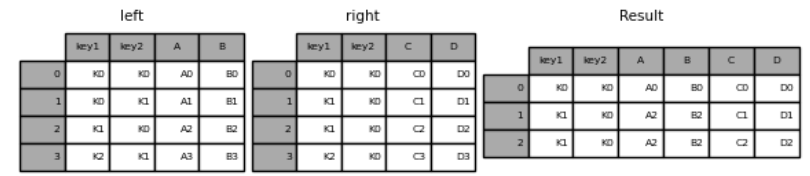

In [ ]:
pd.merge(populations, gdps, on="Country")
# Country在df1和df2同时出现

,Country,Population,GDP
0,China,1444216107,14342903
1,India,1393409038,2875142
2,Pakistan,220892331,263687


### Outer Merge (Outer Join)

Keeps all rows from both tables; unmatched keys get NaN on missing sides.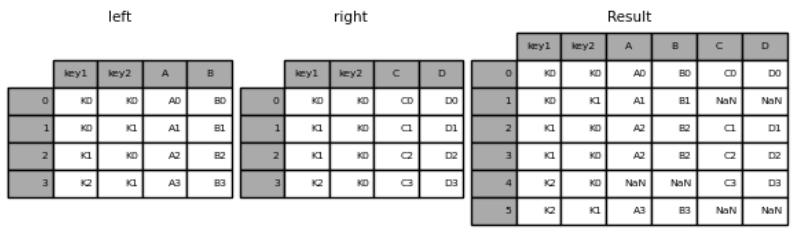

In [12]:
pd.merge(populations, gdps, on="Country", how="outer")

,Country,Population,GDP
0,China,1.444216e+09,14342903
1,India,1.393409e+09,2875142
2,Indonesia,NaN,1058393
3,Pakistan,2.208923e+08,263687
4,United States,NaN,21433226


### Left Merge (Left Join)
Keeps all rows from the left table; matches from right table when possible; missing values become NaN.

In [13]:
pd.merge(populations, gdps, on="Country", how="left")

,Country,Population,GDP
0,China,1444216107,14342903
1,India,1393409038,2875142
2,Pakistan,220892331,263687


### Right Merge (Right Join)
Keeps all rows from the right table; unmatched values on left become NaN.

In [14]:
pd.merge(populations, gdps, on="Country", how="right")

,Country,Population,GDP
0,China,1.444216e+09,14342903
1,India,1.393409e+09,2875142
2,United States,NaN,21433226
3,Indonesia,NaN,1058393
4,Pakistan,2.208923e+08,263687


### Cross Merge (Cross Join / Cartesian Product)
Every row from left is paired with every row from right — no key needed.
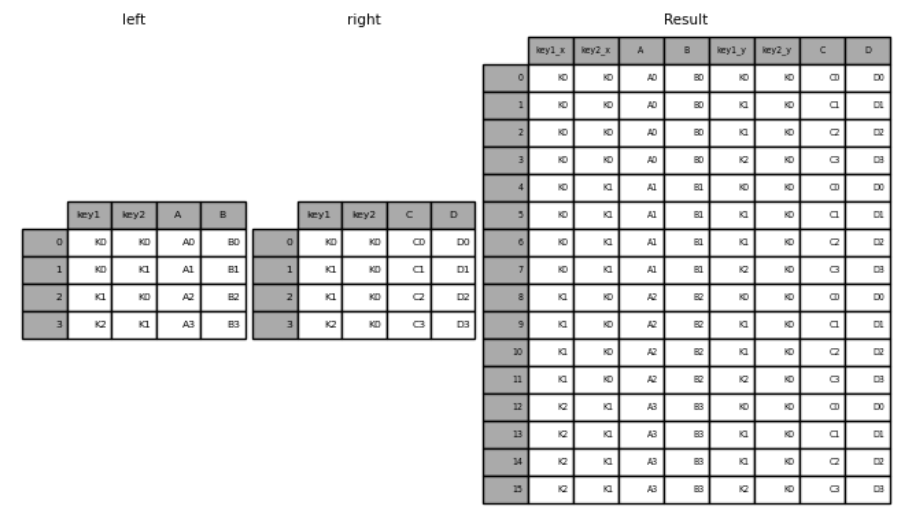

In [16]:
pd.merge(populations, gdps, how="cross")

,Country_x,Population,Country_y,GDP
0,China,1444216107,China,14342903
1,China,1444216107,India,2875142
2,China,1444216107,United States,21433226
3,China,1444216107,Indonesia,1058393
4,China,1444216107,Pakistan,263687
5,India,1393409038,China,14342903
6,India,1393409038,India,2875142
7,India,1393409038,United States,21433226
8,India,1393409038,Indonesia,1058393
9,India,1393409038,Pakistan,263687


### Many-to-one / Many-to-many merges
Based on whether the merge keys contain duplicates in either table.

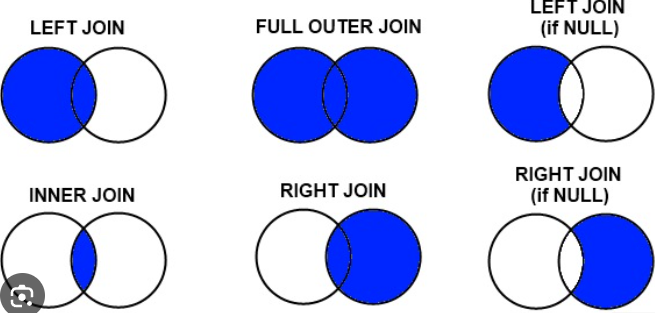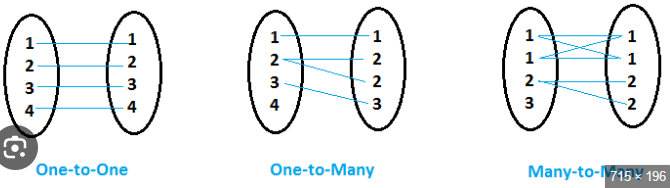

---
---
## Question 10

Why would you use an API?

API 的全称是 应用编程接口（Application Programming Interface）。 
简而言之，API 是一种机制或一套规则，它允许两个不同的软件程序或应用相互通信、交换数据和共享功能，而不需要开发者从头编写所有代码。 

You would use an API (Application Programming Interface) because it allows your program to access data or functionality from another service without having to build everything yourself. APIs provide a structured, safe, and efficient way to interact with external systems.

Typical reasons to use an API:

- Access external data or services
    - Example: Fetching获取 weather data from a weather API.
    - Example: getting stock prices, map locations.

- Automate tasks
    - Example: sending automated emails or posting to social media.
    - 你可以通过 API 让程序自动发消息、更新数据、处理支付等。

- Use external functionality
    - Example: Using a payment API like Stripe to process transactions.
    - Example: 如使用 Google Maps API 来生成地图，而不需要自己开发地图系统。

- Connect different systems together
    - Example: A travel app gets flight information from an airline’s system.

- Ensure consistent, secure interaction between systems 确保安全、标准化地交互
    - APIs standardize how programs talk to each other. API 定义了固定的输入、输出和权限规则。

---
---
## Question 11
Suppose you have this JSON stored in a candidates variable. Write code to retrieve the name.

In [ ]:
{
  "results": [{ "name": "Jimmy McMillan", "first_file_date": "2010-01-01" }]
}

In [ ]:
name = candidates["results"][0]["name"]
print(name)